# Multiple Linear Regression

You are given a real estate dataset. 
You are expected to create a multiple linear regression.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

#### Load data

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/MarcoCalbucci/DataAnalytics/main/PredictiveModeling/Regression/MultipleLinearRegression/Examples/real_estate_price_size_year.csv')
df.head()

#### Data exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   100 non-null    float64
 1   size    100 non-null    float64
 2   year    100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [5]:
df.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


Text(0.5, 0, 'size')

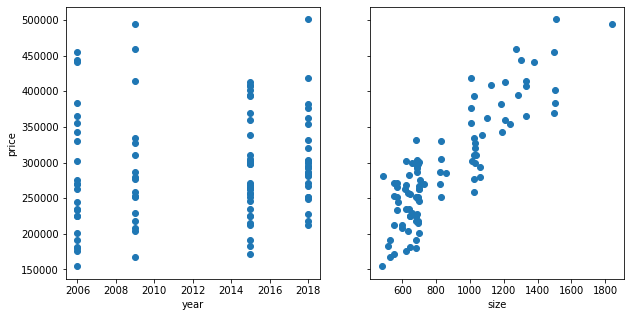

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
axs[0].scatter(df['year'], df['price'])
axs[1].scatter(df['size'], df['price'])

axs[0].set_ylabel('price')
axs[0].set_xlabel('year')
axs[1].set_xlabel('size')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


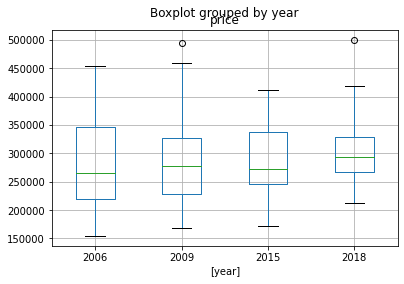

In [24]:
df.boxplot(column=['price',], by=['year']);

#### Regression with statsmodels

In [13]:
y = df['price']
X = df[['size','year']]

In [14]:
X1 = sm.add_constant(X)
results = sm.OLS(y,X1).fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     168.5
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           2.77e-32
Time:                        19:53:34   Log-Likelihood:                -1191.7
No. Observations:                 100   AIC:                             2389.
Df Residuals:                      97   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.772e+06   1.58e+06     -3.647      0.000   -8.91e+06   -2.63e+06
size         227.7009     12.474     18.254      0.000     202.943     252.458
year        2916.7853    785.896      3.711      0.000    1357.000    4476.571
==============================================================================
Omnibus:                       10.083   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.678
Skew:                           0.095   Prob(JB):                        0.159
Kurtosis:                       2.080   Cond. No.                     9.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Regression with Scikit Learn

In [26]:
X = df[['year', 'size']].to_numpy()
y = df['price'].to_numpy()

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

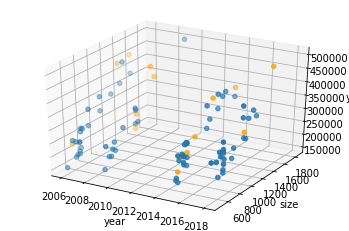

In [33]:
# Plot data

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('year')
ax.set_ylabel('size')
ax.set_zlabel('y')
ax.scatter3D(X_train[:,0], X_train[:,1], y_train)
ax.scatter3D(X_test[:,0], X_test[:,1], y_test, color='orange')

plt.show()

In [28]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = reg.predict(X_test)

In [39]:
from sklearn.metrics import r2_score

print("r2_score: {:.2f}".format(r2_score(y_test, y_pred)))

r2_score: 0.79
